# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from ratelimiter import RateLimiter
from datetime import datetime
import json
from sklearn import datasets

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [8]:
record_counter = 0
set_counter = 0

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
rate_limiter = RateLimiter(max_calls=50, period=100)

print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    with rate_limiter:
        query_url = url + "&q=" + city
        response = requests.get(query_url).json()
        if record_counter < 50:
            record_counter += 1
        else:
            set_counter += 1
            record_counter = 1

        print(f"Processing record {record_counter} of set {set_counter} | {city}")
        
        try:
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            temp.append(response['main']['temp_max'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            wind.append(response['wind']['speed'])
            new_cities.append(city)
        except:
            print("City not found. Skipping...")
            pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | santa rosa
Processing record 2 of set 0 | faanui
Processing record 3 of set 0 | northam
Processing record 4 of set 0 | kapaa
Processing record 5 of set 0 | ponta do sol
Processing record 6 of set 0 | bambous virieux
Processing record 7 of set 0 | ushuaia
Processing record 8 of set 0 | hobart
Processing record 9 of set 0 | kuala krai
City not found. Skipping...
Processing record 10 of set 0 | banyo
Processing record 11 of set 0 | kloulklubed
Processing record 12 of set 0 | tasiilaq
Processing record 13 of set 0 | pingliang
Processing record 14 of set 0 | vaini
Processing record 15 of set 0 | east london
Processing record 16 of set 0 | the valley
Processing record 17 of set 0 | hermanus
Processing record 18 of set 0 | toropets
Processing record 19 of set 0 | kongsberg
Processing record 20 of set 0 | kudahuvadhoo
Processing record 21 of set 0 | dikson
Processing record 22 of set 0 | olafsvik
City not found. S

Processing record 35 of set 3 | kavaratti
Processing record 36 of set 3 | nantucket
Processing record 37 of set 3 | gusev
Processing record 38 of set 3 | koumac
Processing record 39 of set 3 | santa maria da vitoria
Processing record 40 of set 3 | talakan
Processing record 41 of set 3 | virginia beach
Processing record 42 of set 3 | turukhansk
Processing record 43 of set 3 | gamba
Processing record 44 of set 3 | codrington
Processing record 45 of set 3 | bandarbeyla
Processing record 46 of set 3 | komsomolskiy
Processing record 47 of set 3 | tlalpujahua
City not found. Skipping...
Processing record 48 of set 3 | gedo
Processing record 49 of set 3 | sao felix do xingu
Processing record 50 of set 3 | korla
City not found. Skipping...
Processing record 1 of set 4 | partyzany
Processing record 2 of set 4 | sao joao da barra
Processing record 3 of set 4 | akyab
City not found. Skipping...
Processing record 4 of set 4 | den helder
Processing record 5 of set 4 | milton keynes
Processing recor

Processing record 21 of set 7 | banjar
Processing record 22 of set 7 | novyy urgal
Processing record 23 of set 7 | mega
Processing record 24 of set 7 | walvis bay
Processing record 25 of set 7 | mandalgovi
Processing record 26 of set 7 | alice springs
Processing record 27 of set 7 | coquimbo
Processing record 28 of set 7 | utiroa
City not found. Skipping...
Processing record 29 of set 7 | ballina
Processing record 30 of set 7 | kamenskoye
City not found. Skipping...
Processing record 31 of set 7 | zarubino
Processing record 32 of set 7 | leua
Processing record 33 of set 7 | kavieng
Processing record 34 of set 7 | angoche
Processing record 35 of set 7 | ahipara
Processing record 36 of set 7 | la asuncion
Processing record 37 of set 7 | yellandu
Processing record 38 of set 7 | nishihara
Processing record 39 of set 7 | mongoumba
Processing record 40 of set 7 | revelstoke
Processing record 41 of set 7 | jibuti
City not found. Skipping...
Processing record 42 of set 7 | yarega
Processing re

Processing record 7 of set 11 | severo-yeniseyskiy
Processing record 8 of set 11 | san quintin
Processing record 9 of set 11 | nirasaki
Processing record 10 of set 11 | thilogne
City not found. Skipping...
Processing record 11 of set 11 | togur
Processing record 12 of set 11 | geresk
City not found. Skipping...
Processing record 13 of set 11 | asfi
City not found. Skipping...
Processing record 14 of set 11 | namibe
Processing record 15 of set 11 | corrales
Processing record 16 of set 11 | karasjok
Processing record 17 of set 11 | samarai
Processing record 18 of set 11 | turek
Processing record 19 of set 11 | pimentel
Processing record 20 of set 11 | oranjemund
Processing record 21 of set 11 | lamar
Processing record 22 of set 11 | toora-khem
Processing record 23 of set 11 | marsh harbour
Processing record 24 of set 11 | jiangyou
Processing record 25 of set 11 | faya
Processing record 26 of set 11 | hobyo
Processing record 27 of set 11 | imisli
City not found. Skipping...
Processing rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
weather_pd = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,  
    "Max Temp": temp,
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_pd)
weather_data.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [77]:
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,santa rosa,0,AR,1569160386,27,-36.62,-64.29,64.77,14.67
1,faanui,0,PF,1569160387,81,-16.48,-151.75,80.25,19.15
2,northam,67,AU,1569160387,76,-31.65,116.67,53.60,8.05
3,kapaa,75,US,1569160713,83,22.08,-159.32,78.80,3.36
4,ponta do sol,12,BR,1569160387,36,-20.63,-46.00,89.61,4.72


In [78]:
weather_data.to_csv("weather_output.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

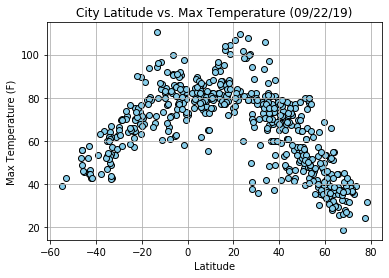

In [85]:
plt.scatter(weather_data["Lat"],weather_data["Max Temp"],edgecolors="black", c="skyblue")
plt.title("City Latitude vs. Max Temperature (09/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (linestyle="-")
plt.savefig("City Latitude vs. Max Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

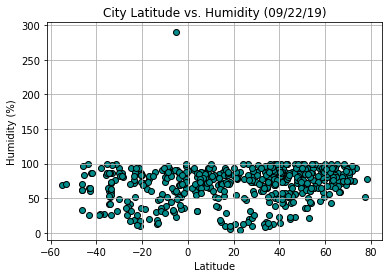

In [86]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"],edgecolors="black", c="darkcyan")
plt.title("City Latitude vs. Humidity (09/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid ()
plt.savefig("City Latitude vs. Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

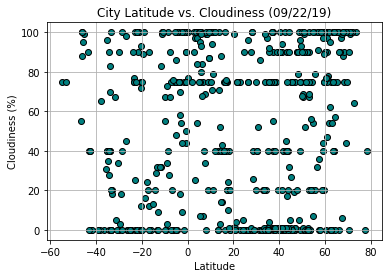

In [87]:
plt.scatter(weather_data["Lat"],weather_data["Cloudiness"],edgecolors="black", c="teal")
plt.title("City Latitude vs. Cloudiness (09/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid ()
plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

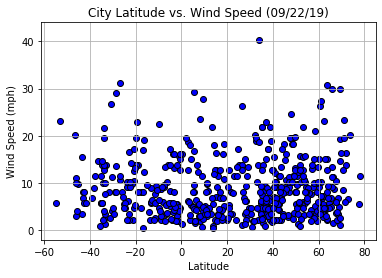

In [88]:
plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],edgecolors="black", c="blue")
plt.title("City Latitude vs. Wind Speed (09/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid ()
plt.ylim(-2,44)
plt.savefig("City Latitude vs. Wind Speed.png")
plt.show()

## Linear Regression

In [92]:
# OPTIONAL: Create a function to create Linear Regression plots

,Unnamed: 0,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,santa rosa,0,AR,1569160386,27,-36.62,-64.29,64.77,14.67
1,1,faanui,0,PF,1569160387,81,-16.48,-151.75,80.25,19.15
2,2,northam,67,AU,1569160387,76,-31.65,116.67,53.60,8.05
3,3,kapaa,75,US,1569160713,83,22.08,-159.32,78.80,3.36
4,4,ponta do sol,12,BR,1569160387,36,-20.63,-46.00,89.61,4.72


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression